In [49]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [50]:
import tensorflow_hub as hub

In [3]:
path = 'train//'
img_size = 128
training_data = []

def create_training_data():
    for img in os.listdir(path):
        class_num = img.startswith("cat")*1
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass
    
create_training_data()

In [4]:
print(len(training_data))

25000


In [5]:
import random

random.shuffle(training_data)

In [6]:
X = []
Y = []
num=2000

for features, label in training_data[0:num]:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X = X/255.
Y = np.array(Y).reshape(-1, 1)

In [7]:
print(Y.shape)

(2000, 1)


In [8]:
X_test = []
Y_test = []
num=2000

for features, label in training_data[num:int(100+num)]:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
X_test = X_test/255.
Y_test = np.array(Y_test)

In [9]:
print(X.shape)

(2000, 128, 128, 3)


In [10]:
import pickle

In [11]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
X = X

In [ ]:
Y.shape

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=01e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

lr_final = 1e-5

def scheduler(epoch, lr):
    if epoch < 4:
        return lr
    else:
        return lr_final

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X, Y, batch_size=64, epochs=10, callbacks=[callback])

c:\Users\franc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.5068 - loss: 0.6973 - learning_rate: 1.0000e-05
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.5498 - loss: 0.6833 - learning_rate: 1.0000e-05
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5790 - loss: 0.6770 - learning_rate: 1.0000e-05
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6433 - loss: 0.6696 - learning_rate: 1.0000e-05
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6372 - loss: 0.6584 - learning_rate: 1.0000e-05
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6751 - loss: 0.6461 - learning_rate: 1.0000e-05
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6731 - loss: 0.6389 - learning_rate: 1.0000e-05
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6840 - loss: 0.6311 - learning_rate: 1.0000e-05
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6596 - loss: 0.6270 - learning_rate: 1.0

In [46]:
model.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6578 - loss: 0.6345


[0.6255785822868347, 0.6600000262260437]

In [47]:
other_model = Sequential()
other_model.add(Flatten(input_shape=X.shape[1:]))
other_model.add(BatchNormalization())
other_model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.02)))
other_model.add(BatchNormalization())
other_model.add(Activation('sigmoid'))

other_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
other_model.fit(X, Y, batch_size=32, epochs=10, callbacks=[callback])

c:\Users\franc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - accuracy: 0.5076 - loss: 0.9381 - learning_rate: 1.0000e-05
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.5746 - loss: 0.7669 - learning_rate: 1.0000e-05
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.5757 - loss: 0.7451 - learning_rate: 1.0000e-05
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.6129 - loss: 0.7342 - learning_rate: 1.0000e-05
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.6097 - loss: 0.7289 - learning_rate: 1.0000e-05
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.6326 - loss: 0.7219 - learning_rate: 1.0000e-05
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.6367 - loss: 0.7116 - learning_rate: 1.0000e-05
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.6537 - loss: 0.7009 - learning_rate: 1.0000e-05
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.6490 - loss: 0.

In [48]:
other_model.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5643 - loss: 0.7858


[0.7704394459724426, 0.5799999833106995]

In [ ]:
dir(Flatten(input_shape=X.shape[1:]))

In [24]:
model.save('epic_cat_reader.keras')

In [26]:
loaded_model = tf.keras.models.load_model('epic_cat_reader.keras')

In [ ]:
predictions = loaded_model.predict([X_test])

In [ ]:
predictions = model.predict([X_test])

In [ ]:
example = 11
print(np.argmax(predictions[example]))
print('the true value is', Y_test[example])

plt.imshow(X_test[example])
plt.show()

In [33]:
import tf_keras
# from tf_keras.models import Sequential
# from tf_keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization


In [14]:
classifier = tf_keras.Sequential([
hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-classification/2")
])


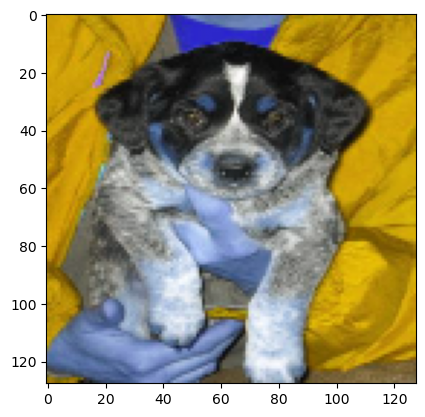

In [26]:
plt.imshow(X[20])
plt.show()

In [27]:
example = X[20]
result = classifier.predict(example[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 577ms/step


(1, 1001)

In [24]:
predicted_label_index = np.argmax(result)
predicted_label_index

251

In [25]:
image_labels = []
with open("all_classes.txt") as f:
    image_labels = f.read().splitlines()
    
image_labels[251]

'Siberian husky'

In [29]:
feature_extractor_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-128-feature-vector/2"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, trainable=False)

In [38]:
semitrained_model = tf_keras.Sequential([pretrained_model_without_top_layer, tf_keras.layers.Dense(2)])
#semitrained_model.add(Dense(1))
#semitrained_model.add(Activation('sigmoid'))

#semitrained_model.summary()

In [40]:
semitrained_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

semitrained_model.fit(X, Y, epochs=5)

Epoch 1/5
63/63 [==============================] - 39s 370ms/step - loss: 0.7064 - accuracy: 0.5430
Epoch 2/5
63/63 [==============================] - 9s 141ms/step - loss: 0.6931 - accuracy: 0.5555
Epoch 3/5
63/63 [==============================] - 9s 139ms/step - loss: 0.6931 - accuracy: 0.5545
Epoch 4/5
63/63 [==============================] - 10s 152ms/step - loss: 0.6931 - accuracy: 0.5545
Epoch 5/5
63/63 [==============================] - 9s 135ms/step - loss: 0.6931 - accuracy: 0.5545
